Identitas diri :

*   Nama : Herlana
*   Email : hrlana1312@gmail.com


In [1]:
""" 
Dataset berasal dari https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

Bisa di download dari link drive berikut :
Link drive : https://drive.google.com/file/d/1FFZe6CoZ_Y3GAYojQgMXmeD2RiKEr105/view?usp=sharing
"""

from google.colab import drive
drive.mount('/content/drive')

!apt install unzip

!unzip -q drive/'My Drive'/Dataset/rockpaperscissors.zip

Mounted at /content/drive
Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [2]:
# Import Library
import sys
import os
import time
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras import optimizers
from keras.models import Sequential, load_model
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras import callbacks

# Starting Time
start = time.time()

In [3]:
# Parameters
img_width, img_height = 150, 150
batch_size = 32
epoch = 20
samples_per_epoch = 38
val_steps_per_epoch = 25
nb_filters1 = 32
nb_filters2 = 64
conv1_size = 3
conv2_size = 2
pool_size = 2
classes_num = 3
learning_rate = 0.0004


In [4]:
# Direktori data training and validation
train_data_path = '/content/rockpaperscissors/train'
validation_data_path = '/content/rockpaperscissors/val'

In [5]:
# Architecture
model = Sequential()
model.add(Convolution2D(nb_filters1, conv1_size, conv1_size, input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Convolution2D(nb_filters2, conv2_size, conv2_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(classes_num, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=learning_rate),
              metrics=['accuracy'])

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1. / 255)

validation_generator = test_datagen.flow_from_directory(
    validation_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')



Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [7]:
# Tensorboard log
log_dir = '/content/output/log'
tb_cb = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=0)
cbks = [tb_cb]



In [8]:
# Training models

history = model.fit(
            train_generator,
            steps_per_epoch=samples_per_epoch,
            epochs=epoch,
            validation_data=validation_generator,
            callbacks=cbks,
            validation_steps=val_steps_per_epoch
            )

Epoch 1/20
38/38 [==============================] - 14s 336ms/step - loss: 1.0863 - accuracy: 0.3851 - val_loss: 0.8915 - val_accuracy: 0.7625
Epoch 2/20
38/38 [==============================] - 12s 326ms/step - loss: 0.8691 - accuracy: 0.6458 - val_loss: 0.7176 - val_accuracy: 0.7138
Epoch 3/20
38/38 [==============================] - 12s 326ms/step - loss: 0.7103 - accuracy: 0.7194 - val_loss: 0.6198 - val_accuracy: 0.7450
Epoch 4/20
38/38 [==============================] - 12s 326ms/step - loss: 0.6310 - accuracy: 0.7810 - val_loss: 0.4784 - val_accuracy: 0.8537
Epoch 5/20
38/38 [==============================] - 12s 318ms/step - loss: 0.5617 - accuracy: 0.7891 - val_loss: 0.4486 - val_accuracy: 0.8687
Epoch 6/20
38/38 [==============================] - 12s 324ms/step - loss: 0.5039 - accuracy: 0.8214 - val_loss: 0.3783 - val_accuracy: 0.8888
Epoch 7/20
38/38 [==============================] - 12s 318ms/step - loss: 0.4379 - accuracy: 0.8294 - val_loss: 0.3691 - val_accuracy: 0.8813

In [9]:
# Saving model

target_dir = '/content/output/model'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)
model.save('/content/output/model/model.h5')
model.save_weights('/content/output/model/weights.h5')


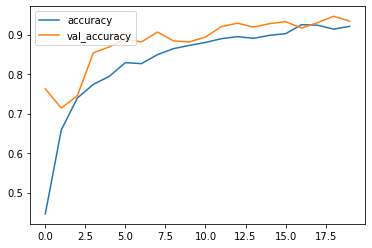

In [10]:
# Visualization of accuracy model

from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend(loc="upper left")
plt.show()

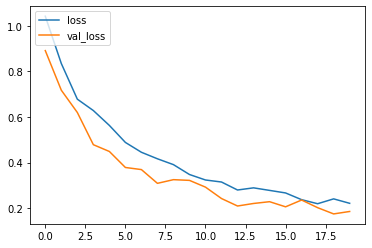

In [11]:
# Visualization of loss model

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc="upper left")
plt.show()

In [12]:
#Calculate execution time

end = time.time()
dur = end-start

if dur>60 and dur<3600:
    dur=dur/60
    print("Execution Time: %.4f" % dur," minutes")
else:
    dur=dur/(60*60)
    print("Execution Time: %.4f" % dur,"hours")

Execution Time: 5.4069  minutes


Testing

In [13]:
# Import library

from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline


In [14]:
#Prediction Function

def predict(file):
  img = load_img(file, target_size=(img_width,img_height))
  plt.imshow(img)
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
  array = model.predict(x)
  result = array[0]
  # print('result : ', result)
  answer = np.argmax(result)
  # print('answer : ', answer)
  if answer == 1:
    print("Result of prediction : rock")
  elif answer == 0:
    print("Result of prediction : paper")
  elif answer == 2:
    print("Result of prediction : scissors")

  return answer

Choice image for testing : 
1. From direktori
2. Upload File
Enter your choices : 2


Saving WhatsApp Image 2021-05-15 at 13.26.43.jpeg to WhatsApp Image 2021-05-15 at 13.26.43.jpeg

**************************************************************

File Path :  WhatsApp Image 2021-05-15 at 13.26.43.jpeg
Result of prediction : paper


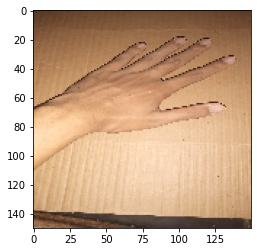

In [15]:
# Testing model

print('Choice image for testing : ')
print('1. From direktori')
print('2. Upload File')
choice = input('Enter your choices : ')

if choice == '1' :
  filepath = input('Enter your image path :')
  print('\n**************************************************************\n')
  print('File Path : ', filepath)
  result = predict(filepath)
elif choice == '2' :
  uploaded = files.upload()
  for fp in uploaded.keys():
    filepath = fp
    print('\n**************************************************************\n')
    print('File Path : ', filepath)
    result = predict(filepath)
else :
  print('Your input invalid!')
